# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [6]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# Create two new dataframes
north_df = pd.read_csv(r"C:\Users\16183\Downloads\NorthCallCenter.csv") 

north_df.head(10)



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [7]:
south_df = pd.read_csv(r"C:\Users\16183\Downloads\SouthCallCenter.csv")

south_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [12]:
#Code Used: 
north_df_indexed = pd.read_csv(r"C:\Users\16183\Downloads\NorthCallCenter.csv", index_col="Rep ID")

# north_df.info()

# north_df[['Rep ID']]

north_df['Rep ID'].unique()

array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

In [ ]:
# There are 9 reps in the North Call Center branch (Brent, Cam, Todd, Duke, Joe, Lilly, Amanda, Andy, and Xander).

#### EDA Question 1B:  How many reps are in the South branch?  

In [13]:
#Code Used:
south_df_indexed = pd.read_csv(r"C:\Users\16183\Downloads\NorthCallCenter.csv", index_col="Rep ID")

# south_df.info()

# south_df[['Rep ID']]

south_df['Rep ID'].unique()


array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

In [ ]:
# There are 11 reps in the southern call center branch (Kate, Eric, Susan, Alice, Sandy, Karl, Randy, George, Helga, 
# Josh, and Sharon.)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [17]:
#Code Used:
# north_df.groupby(["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]).mean()

# north_df.groupby("Busy Minutes").mean(numeric_only=True)

north_df.describe() 

# Average busy minutes = 9.99 minutes
# Average not ready minutes = 1.91 minutes
# Average incoming wait times = 3.05 minutes
# Average during call wait times = 2.97 minutes

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [18]:
#Code Used:
south_df.describe() 

# Average busy minutes = 10.05 minutes
# Average not ready minutes = 1.91 minutes
# Average incoming wait times = 3.00 minutes
# Average during call wait times = 3.08 minutes


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [22]:
# Code Used: 
# north_df.describe()

north_df[["Calls", "Time Block"]].groupby("Time Block").count()

# (numeric_only=True)

,Calls
Time Block,
10:00 AM,43
11:00 AM,25
12:00 PM,45
1:00 PM,17
2:00 PM,35
3:00 PM,30
4:00 PM,28
5:00 PM,17
9:00 AM,5


In [23]:
# south_df.describe()

south_df[["Calls", "Time Block"]].groupby("Time Block").count()

# Total calls taken are 245 (North) and 314 (South) = 559 total calls taken

,Calls
Time Block,
10:00 AM,56
11:00 AM,31
12:00 PM,75
1:00 PM,23
2:00 PM,30
3:00 PM,43
4:00 PM,25
5:00 PM,26
9:00 AM,5


In [54]:
north_timeblock = north_df[["Time Block","Calls"]].groupby("Time Block").count()
south_timeblock = south_df[["Time Block","Calls"]].groupby("Time Block").count()
# combine the two dfs into one, retaining Time Block as the distinguishing factor
combined_timeblock = north_timeblock.merge(south_timeblock, on="Time Block")
# sum the number of calls for each branch into one column labeled "Calls"
combined_timeblock["Calls"] = (combined_timeblock["Calls_x"] + combined_timeblock["Calls_y"])
# remove the north and south specific columns
combined_timeblock = combined_timeblock.drop('Calls_x',axis =1)
combined_timeblock = combined_timeblock.drop('Calls_y',axis =1)

combined_timeblock

,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99 minutes
> - Not Ready Minutes = 1.91 minutes
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 minutes
> - Not Ready Minutes = 1.91 minutes
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 5 + 5 = 10
> - 10:00AM  = 43 + 56 = 99
> - 11:00AM  = 25 + 31 = 56
> - 12:00PM  = 45 + 75 = 120
> - 1:00PM   = 17 + 23 = 40
> - 2:00PM   = 30 + 35 = 65
> - 3:00PM   = 30 + 43 = 73
> - 4:00PM   = 28 + 25 = 53
> - 5:00PM   = 17 + 26 = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

In [28]:
# Code Used
# Add Additional Cells as needed.
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_cells = np.product(north_df.shape)

missing_cells = pd.isnull(north_df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
4.0 % Missing cells from the data


<Axes: >

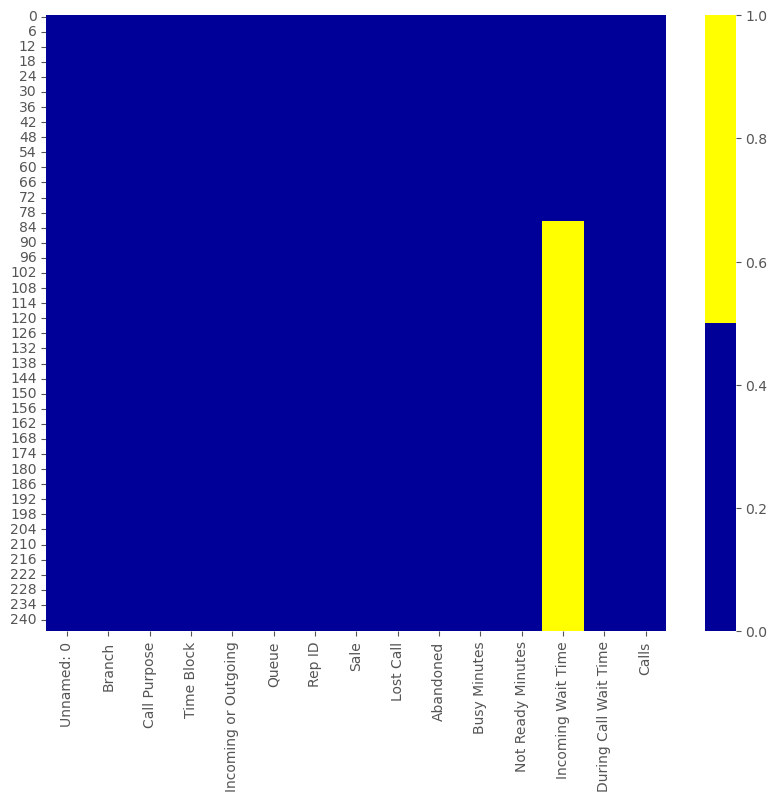

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = north_df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing missing missing
sns.heatmap(north_df[cols].isna(), cmap=sns.color_palette(colours))


<Axes: >

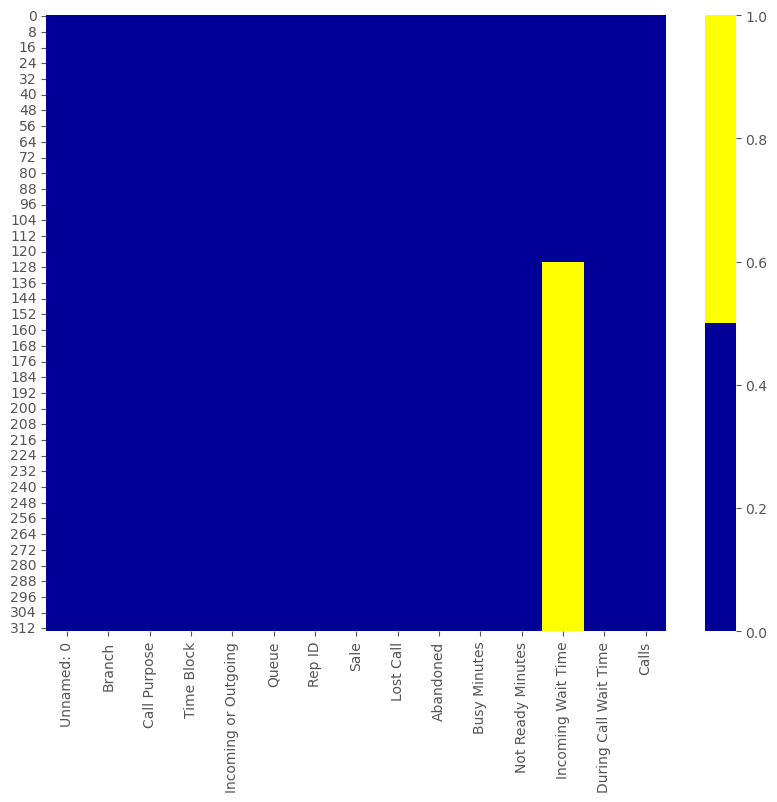

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = south_df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing missing missing
sns.heatmap(south_df[cols].isna(), cmap=sns.color_palette(colours))


In [29]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) 

total_cells = np.product(south_df.shape)

missing_cells = pd.isnull(south_df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")  

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%
4.0 % Missing cells from the data


In [36]:
# print(north_df['Incoming Wait Time'].isna().sum())

north_df_clean = north_df.dropna()
print(north_df_clean)

    Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0            0  North        Complaint    9:00 AM             Incoming     B   
1            1  North    Sales Support   11:00 AM             Incoming     A   
2            2  North    Sales Support   11:00 AM             Incoming     B   
3            3  North    Sales Support    4:00 PM             Incoming     B   
4            4  North  Product Support   12:00 PM             Incoming     B   
..         ...    ...              ...        ...                  ...   ...   
77          77  North  Product Support    3:00 PM             Incoming     B   
78          78  North  Product Support    4:00 PM             Incoming     A   
79          79  North        Complaint   10:00 AM             Incoming     A   
80          80  North        Complaint   12:00 PM             Incoming     B   
81          81  North        Complaint    5:00 PM             Incoming     A   

   Rep ID Sale  Lost Call  Abandoned  B

In [37]:
# print(south_df['Incoming Wait Time'].isna().sum())

south_df_clean = south_df.dropna()
print(south_df_clean)

     Unnamed: 0 Branch   Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  South  Sales Support   10:00 AM             Incoming     D   
1             1  South  Sales Support   10:00 AM             Incoming     C   
2             2  South  Sales Support   10:00 AM             Incoming     C   
3             3  South  Sales Support   10:00 AM             Incoming     C   
4             4  South  Sales Support   12:00 PM             Incoming     C   
..          ...    ...            ...        ...                  ...   ...   
121         121  South      Complaint    1:00 PM             Incoming     D   
122         122  South      Complaint    2:00 PM             Incoming     C   
123         123  South      Complaint    3:00 PM             Incoming     D   
124         124  South      Complaint    4:00 PM             Incoming     C   
125         125  South      Complaint    5:00 PM             Incoming     D   

     Rep ID Sale  Lost Call  Abandoned  Busy Minute

In [38]:
for col in south_df_clean.columns:
    pct_missing = np.mean(south_df_clean[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) 

total_cells = np.product(south_df_clean.shape)

missing_cells = pd.isnull(south_df_clean).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")  

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%
0.0 % Missing cells from the data


In [39]:
for col in north_df_clean.columns:
    pct_missing = np.mean(north_df_clean[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) 

total_cells = np.product(north_df_clean.shape)

missing_cells = pd.isnull(north_df_clean).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")  

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%
0.0 % Missing cells from the data


In [45]:
north_df_clean["Sale"].value_counts()

NO      77
YES      4
YES      1
Name: Sale, dtype: int64

In [47]:
north_df_clean['Sale'].str.strip()
 
# Printing dataframe
north_df_clean["Sale"].value_counts()

NO      77
YES      4
YES      1
Name: Sale, dtype: int64

In [48]:
north_df_clean['Sale'].str.replace(' ', '')

0     NO
1     NO
2     NO
3     NO
4     NO
      ..
77    NO
78    NO
79    NO
80    NO
81    NO
Name: Sale, Length: 82, dtype: object

In [ ]:
# vc_sale = sale.value_counts() 
# vc_test = sale.value_counts() 
# north_df_clean = pd.concat([vc_test, vc_sale], axis=1)

In [55]:
north_df_clean['Sale'].describe()

count     82
unique     3
top       NO
freq      77
Name: Sale, dtype: object

In [56]:
YES_value = north_df_clean['Sale'].unique()
# sort them alphabetically and then take a closer look
YES_value.sort()
YES_value

array(['NO', 'YES', 'YES '], dtype=object)

In [53]:
north_df_clean["Sale"].value_counts()

NO      77
YES      4
YES      1
Name: Sale, dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I used the str.upper to change the values to all YES
Then ran a value count to check the data and found 4 YES and 1 YES entry. I found there was an entry with Yes and a space after it. After changing the entries to the same upper case font, then I removed any possible spaces using str.strip. Then I re-ran the value count below to ensure there were only 2 unique value counts for sale (Yes and No).

In [52]:
south_df_clean["Sale"].value_counts()

NO     124
YES      2
Name: Sale, dtype: int64

In [43]:
south_df_clean['Sale'] = south_df_clean['Sale'].str.upper()
print(south_df_clean)

     Unnamed: 0 Branch   Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  South  Sales Support   10:00 AM             Incoming     D   
1             1  South  Sales Support   10:00 AM             Incoming     C   
2             2  South  Sales Support   10:00 AM             Incoming     C   
3             3  South  Sales Support   10:00 AM             Incoming     C   
4             4  South  Sales Support   12:00 PM             Incoming     C   
..          ...    ...            ...        ...                  ...   ...   
121         121  South      Complaint    1:00 PM             Incoming     D   
122         122  South      Complaint    2:00 PM             Incoming     C   
123         123  South      Complaint    3:00 PM             Incoming     D   
124         124  South      Complaint    4:00 PM             Incoming     C   
125         125  South      Complaint    5:00 PM             Incoming     D   

     Rep ID Sale  Lost Call  Abandoned  Busy Minute

C:\Users\16183\AppData\Local\Temp\ipykernel_8456\2410606201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df_clean['Sale'] = south_df_clean['Sale'].str.upper()


In [57]:
#Code Used
north_df_clean['Sale'] = north_df_clean['Sale'].str.upper()
print(north_df_clean)
# Add Additional Cells as needed.


    Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0            0  North        Complaint    9:00 AM             Incoming     B   
1            1  North    Sales Support   11:00 AM             Incoming     A   
2            2  North    Sales Support   11:00 AM             Incoming     B   
3            3  North    Sales Support    4:00 PM             Incoming     B   
4            4  North  Product Support   12:00 PM             Incoming     B   
..         ...    ...              ...        ...                  ...   ...   
77          77  North  Product Support    3:00 PM             Incoming     B   
78          78  North  Product Support    4:00 PM             Incoming     A   
79          79  North        Complaint   10:00 AM             Incoming     A   
80          80  North        Complaint   12:00 PM             Incoming     B   
81          81  North        Complaint    5:00 PM             Incoming     A   

   Rep ID Sale  Lost Call  Abandoned  B

C:\Users\16183\AppData\Local\Temp\ipykernel_8456\802779043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_df_clean['Sale'] = north_df_clean['Sale'].str.upper()


In [60]:
north_df_clean['Sale'] = north_df_clean['Sale'].str.strip()

C:\Users\16183\AppData\Local\Temp\ipykernel_8456\1045741823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_df_clean['Sale'] = north_df_clean['Sale'].str.strip()


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No duplicates were found by row in either data set. 

In [61]:
YES_value = north_df_clean['Sale'].unique()
# sort them alphabetically and then take a closer look
YES_value.sort()
YES_value

array(['NO', 'YES'], dtype=object)

In [62]:
duplicate = north_df_clean[north_df_clean.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [63]:
duplicate = south_df_clean[south_df_clean.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Yes, the Calls column was uncessary since all values were the same. I cleaned the dataframe by deleting the Calls column below in both data sets. 

In [65]:
north_df_clean.drop(['Calls'], axis=1)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,8,3,5.0,2
78,78,North,Product Support,4:00 PM,Incoming,A,Cam,NO,0,0,11,2,5.0,2
79,79,North,Complaint,10:00 AM,Incoming,A,Joe,NO,0,0,10,2,5.0,2
80,80,North,Complaint,12:00 PM,Incoming,B,Lilly,NO,0,0,11,2,5.0,2


In [66]:
south_df_clean.drop(['Calls'], axis=1)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,South,Complaint,1:00 PM,Incoming,D,Randy,NO,0,0,10,2,5.0,4
122,122,South,Complaint,2:00 PM,Incoming,C,Alice,NO,0,0,11,3,5.0,3
123,123,South,Complaint,3:00 PM,Incoming,D,Kate,NO,0,0,10,2,5.0,3
124,124,South,Complaint,4:00 PM,Incoming,C,Sandy,NO,0,0,9,3,5.0,3


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [69]:
# Create dataframe for the entire company named df
frames = [south_df_clean, north_df_clean]

df = pd.concat(frames)

df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,8,3,5.0,2,1
78,78,North,Product Support,4:00 PM,Incoming,A,Cam,NO,0,0,11,2,5.0,2,1
79,79,North,Complaint,10:00 AM,Incoming,A,Joe,NO,0,0,10,2,5.0,2,1
80,80,North,Complaint,12:00 PM,Incoming,B,Lilly,NO,0,0,11,2,5.0,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Duke with 14 calls
- South Branch = Eric with 18 calls


In [93]:
# df_Rep_Info = df[['Rep ID', 'Branch', 'Calls']].groupby('Rep ID').count()


# df_Rep_Info

df_Rep_Info = df.groupby(['Rep ID', 'Branch', 'Calls']).agg({'Calls':sum})
df_Rep_Info

,,,Calls
Rep ID,Branch,Calls,
Alice,South,1,6
Amanda,North,1,5
Andy,North,1,10
Brent,North,1,8
Cam,North,1,11
Duke,North,1,14
Eric,South,1,18
George,South,1,13
Helga,South,1,11


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 3.66% rate north branch (out of the optimal range)
- South Branch = .79% rate south branch (in optimal range)
- Company Wide = 4 total calls were abandoned company wide out of 208 calls total. 1.92% rate company wide (in optimal range)
- Do any of these fall out of the optimal range of 2-5%? Yes, the North Branch is out of the optimal range.

In [101]:
# North_Abandonment_Rate = round('Abandoned'/'Calls',2)*100
# df[["Abandoned"]].describe()
df_Abandoned_Info = df.groupby(['Abandoned', 'Calls']).agg({'Abandoned':sum})
df_Abandoned_Info


,,Abandoned
Abandoned,Calls,
0,1,0
1,1,4


In [103]:
df[["Abandoned"]].describe()

,Abandoned
count,208.000000
mean,0.019231
std,0.137666
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [106]:
south_df_clean[["Abandoned"]].describe()

,Abandoned
count,126.000000
mean,0.007937
std,0.089087
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [107]:
north_df_clean[["Abandoned"]].describe()

,Abandoned
count,82.000000
mean,0.036585
std,0.188897
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [100]:
df_Call_Total = df. groupby(['Abandoned', 'Calls']).agg({'Calls':sum})

df_Call_Total

,,Calls
Abandoned,Calls,
0,1,204
1,1,4


In [105]:
df_KPI_Percent = (4/208) * 100

df_KPI_Percent

1.9230769230769231

In [108]:
north_Call_Total = north_df_clean. groupby(['Abandoned', 'Calls']).agg({'Calls':sum})

north_Call_Total

,,Calls
Abandoned,Calls,
0,1,79
1,1,3


In [110]:
north_KPI_Percent = (3/82) * 100

north_KPI_Percent

3.6585365853658534

In [111]:
south_Call_Total = south_df_clean. groupby(['Abandoned', 'Calls']).agg({'Calls':sum})

south_Call_Total

,,Calls
Abandoned,Calls,
0,1,125
1,1,1


In [112]:
south_KPI_Percent = (1/126) * 100

south_KPI_Percent

0.7936507936507936

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% of calls answered within 2 seconds; 33 calls total
- South Branch = 38.10% of calls answered within 2 seconds; 48 calls total
- Company Wide = 38.94% of calls answered within 2 seconds; 81 calls total

In [113]:
south_Incoming_Wait_Time_Total = south_df_clean. groupby(['Incoming Wait Time', 'Calls']).agg({'Calls':sum})

south_Incoming_Wait_Time_Total

,,Calls
Incoming Wait Time,Calls,
1.0,1,20
2.0,1,28
3.0,1,29
4.0,1,30
5.0,1,19


In [114]:
South_Incoming_WT_Percent = ((20 + 28) / (20 + 28 + 29+ 30 + 19)) * 100

South_Incoming_WT_Percent

38.095238095238095

In [115]:
north_Incoming_Wait_Time_Total = north_df_clean. groupby(['Incoming Wait Time', 'Calls']).agg({'Calls':sum})

north_Incoming_Wait_Time_Total

,,Calls
Incoming Wait Time,Calls,
1.0,1,17
2.0,1,16
3.0,1,12
4.0,1,20
5.0,1,17


In [116]:
North_Incoming_WT_Percent = ((17 + 16) / (17 + 16 + 12 + 20 + 17)) * 100

North_Incoming_WT_Percent

40.243902439024396

In [117]:
companywide_Incoming_Wait_Time_Total = df. groupby(['Incoming Wait Time', 'Calls']).agg({'Calls':sum})

companywide_Incoming_Wait_Time_Total

,,Calls
Incoming Wait Time,Calls,
1.0,1,37
2.0,1,44
3.0,1,41
4.0,1,50
5.0,1,36


In [118]:
CompanyWide_Incoming_WT_Percent = ((37 + 44) / (37 + 44 + 41 + 50 + 36)) * 100

CompanyWide_Incoming_WT_Percent

38.94230769230769

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds


In [119]:
north_df_clean[["Incoming Wait Time"]].describe()

,Incoming Wait Time
count,82.000000
mean,3.048780
std,1.456382
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [120]:
south_df_clean[["Incoming Wait Time"]].describe()

,Incoming Wait Time
count,126.000000
mean,3.000000
std,1.308434
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [121]:
df[["Incoming Wait Time"]].describe()


,Incoming Wait Time
count,208.000000
mean,3.019231
std,1.365417
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart to display the rates by queue because of the side by side comparison that could be divided by queue. Average abandonment rate per queue: 'A': 0.06, 'B': 0.02, 'C': 0, 'D': 0.01}

C:\Users\16183\AppData\Local\Temp\ipykernel_8456\864360473.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


{'A': 0.05555555555555555, 'B': 0.021739130434782608, 'C': 0.0, 'D': 0.014492753623188406}


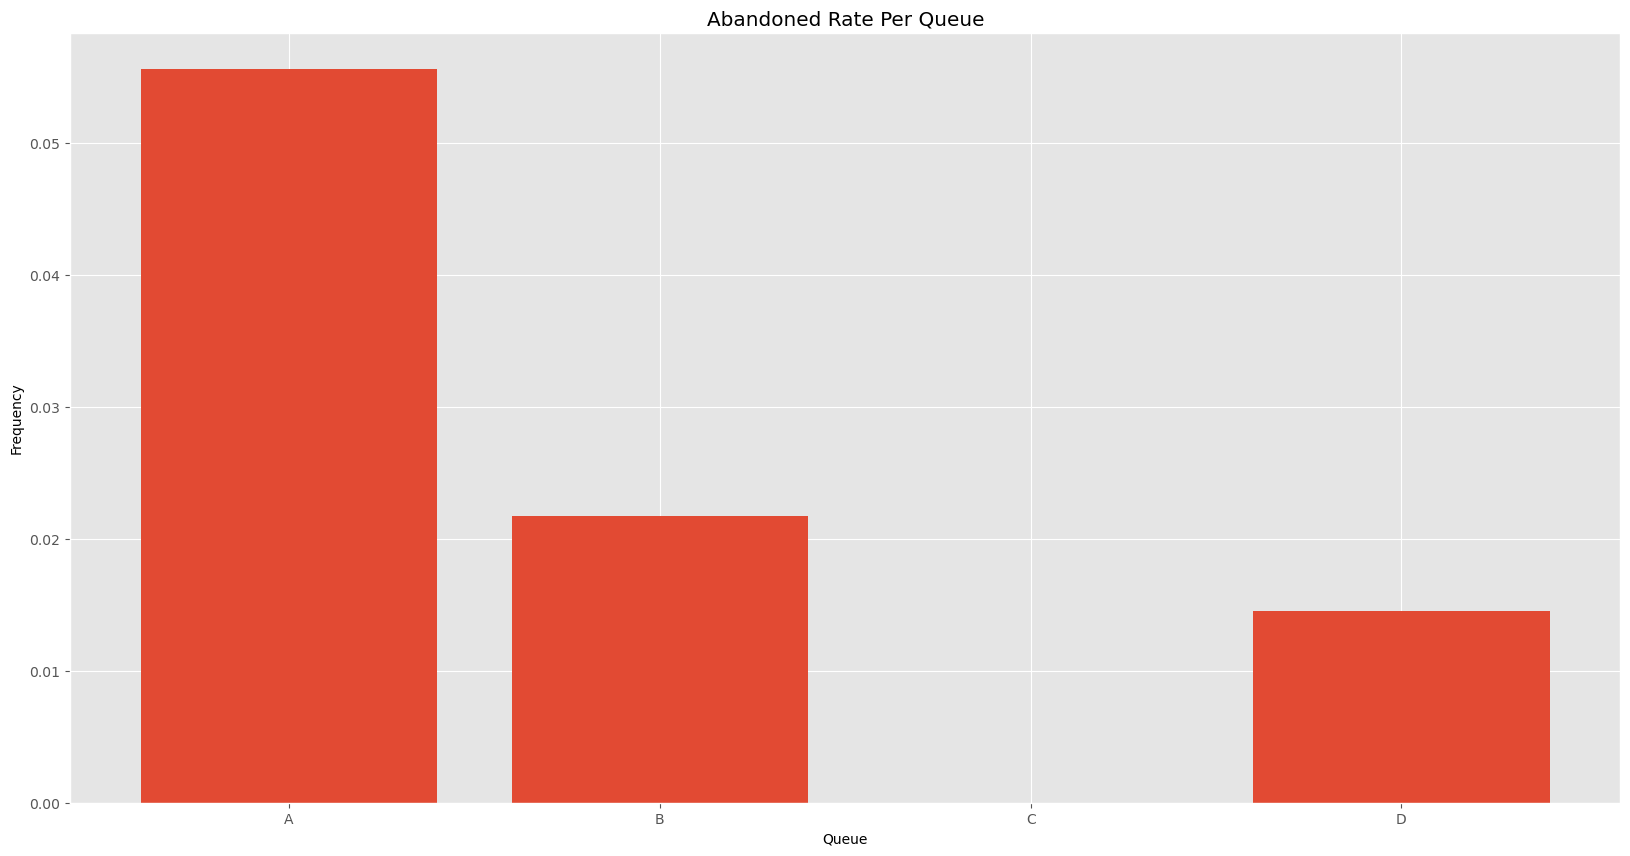

In [273]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)

categories = list(abandonment_rates.keys())
values = list(abandonment_rates.values())
# #Your Code Here:
# plt.bar(queues, abandonment_rates[queues[i]])
# plt.title('Abandoned Rate Per Queue')
# plt.ylabel('Count')

plt.bar(range(len(abandonment_rates)), values, tick_label=categories)
plt.title('Abandoned Rate Per Queue')
plt.ylabel('Frequency')
plt.xlabel('Queue')
plt.show()

# plt.bar((queues), (abandonment_rates))
# plt.title('Abandoned Rate Per Queue')
# plt.ylabel('Frequency')
# plt.xlabel('Queue')


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:
Service Level Percentage:
Amanda    60%
Andy      30%
Brent     75%
Cam       45%
Duke      42%
Joe       20%
Lilly     33%
Todd      33%
Xander    33%

Average Speed of Answer by Rep
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333

> Chart style you chose and why: I wanted to try out a different visualization and looked at a line chart for easy comparison between rep averages in the north branch. Brent was the highest at 75% and Joe was the lowest at 20%.

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
        Calls
Rep ID       
Amanda      3
Andy        3
Brent       6
Cam         5
Duke        6
Joe         2
Lilly       4
Todd        2
Xander      2
        Calls
Rep ID       
Amanda      5
Andy       10
Brent       8
Cam        11
Duke       14
Joe        10
Lilly      12
Todd        6
Xander      6
        Calls_x  Calls_y
Rep ID                  
Amanda        3        5
Andy          3       10
Brent         6        8
Cam           5       11
Duke          6       14
Joe           2       10
Lilly         4       12
Todd          2        6
Xander        2        6
Rep ID
Amanda    60.000000
Andy      30.000000
Brent     75.000000
Cam       45.454545
Duke      42.857143
Joe       

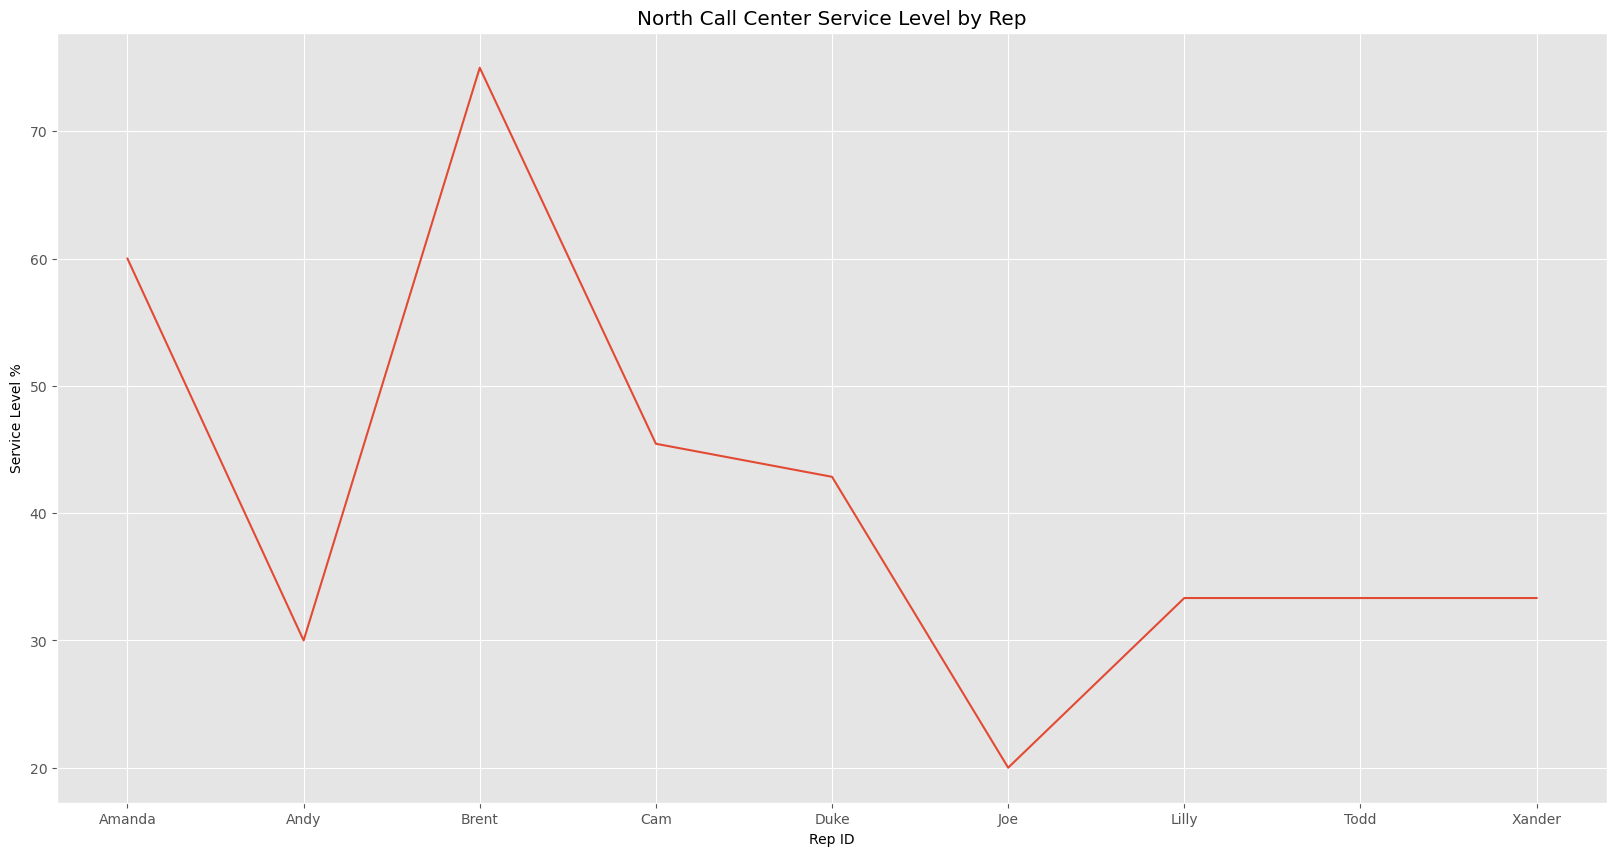

In [274]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)
north_plt = north_df_clean.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

print(north_plt)

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df_clean[north_df_clean["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df_clean[north_df_clean["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

print(total_stats)

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

print(service_level)

# Create Percentage Column in Table 3
service_level_percent = service_level["Calls_x"]/service_level["Calls_y"] * 100

print(service_level_percent)
# categories = list(service_level.keys())
# values = list(service_level.values())

# plt.bar(range(len(north_plt)), values, tick_label=categories)
# plt.title('Abandoned Rate Per Queue')
# plt.ylabel('Frequency')
# plt.xlabel('Queue')
# plt.show()
# plt.fill_between(north_df_clean.index, north_df_clean[service_level], color="skyblue", alpha=0.4)
# plt.plot(service_level.index, north_df_clean['Rep ID'], color = 'Slateblue', alpha = 0.6)
lines = service_level_percent.plot.line()
# fig1 = north_df_clean[service_level, "Rep ID"].plot
plt.title('North Call Center Service Level by Rep')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')
# plt.xticks(color = 'black')
# plt.yticks(color = 'black')

# plt.ylabel('Frequency')
# plt.xlabel('Queue')
# plt.show()
# plt.savefig('linechart_single.png')

plt.show()


In [275]:
south_plt = south_df_clean.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

print(south_plt)

# Average wait time - South Branch

    Rep ID  Incoming Wait Time
0    Alice            2.500000
1     Eric            2.611111
2   George            3.153846
3    Helga            3.272727
4     Josh            3.444444
5     Karl            2.888889
6     Kate            3.363636
7    Randy            2.937500
8    Sandy            2.615385
9   Sharon            3.625000
10   Susan            2.916667


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar graph to easily compare between call purpse (complaint, product support, and sales support). All calls were incoming and of the calls: 51 were complaints, 82 were product support, and 75 were sales support.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                51
Product Support  Incoming                82
Sales Support    Incoming                75
Name: Incoming or Outgoing, dtype: int64


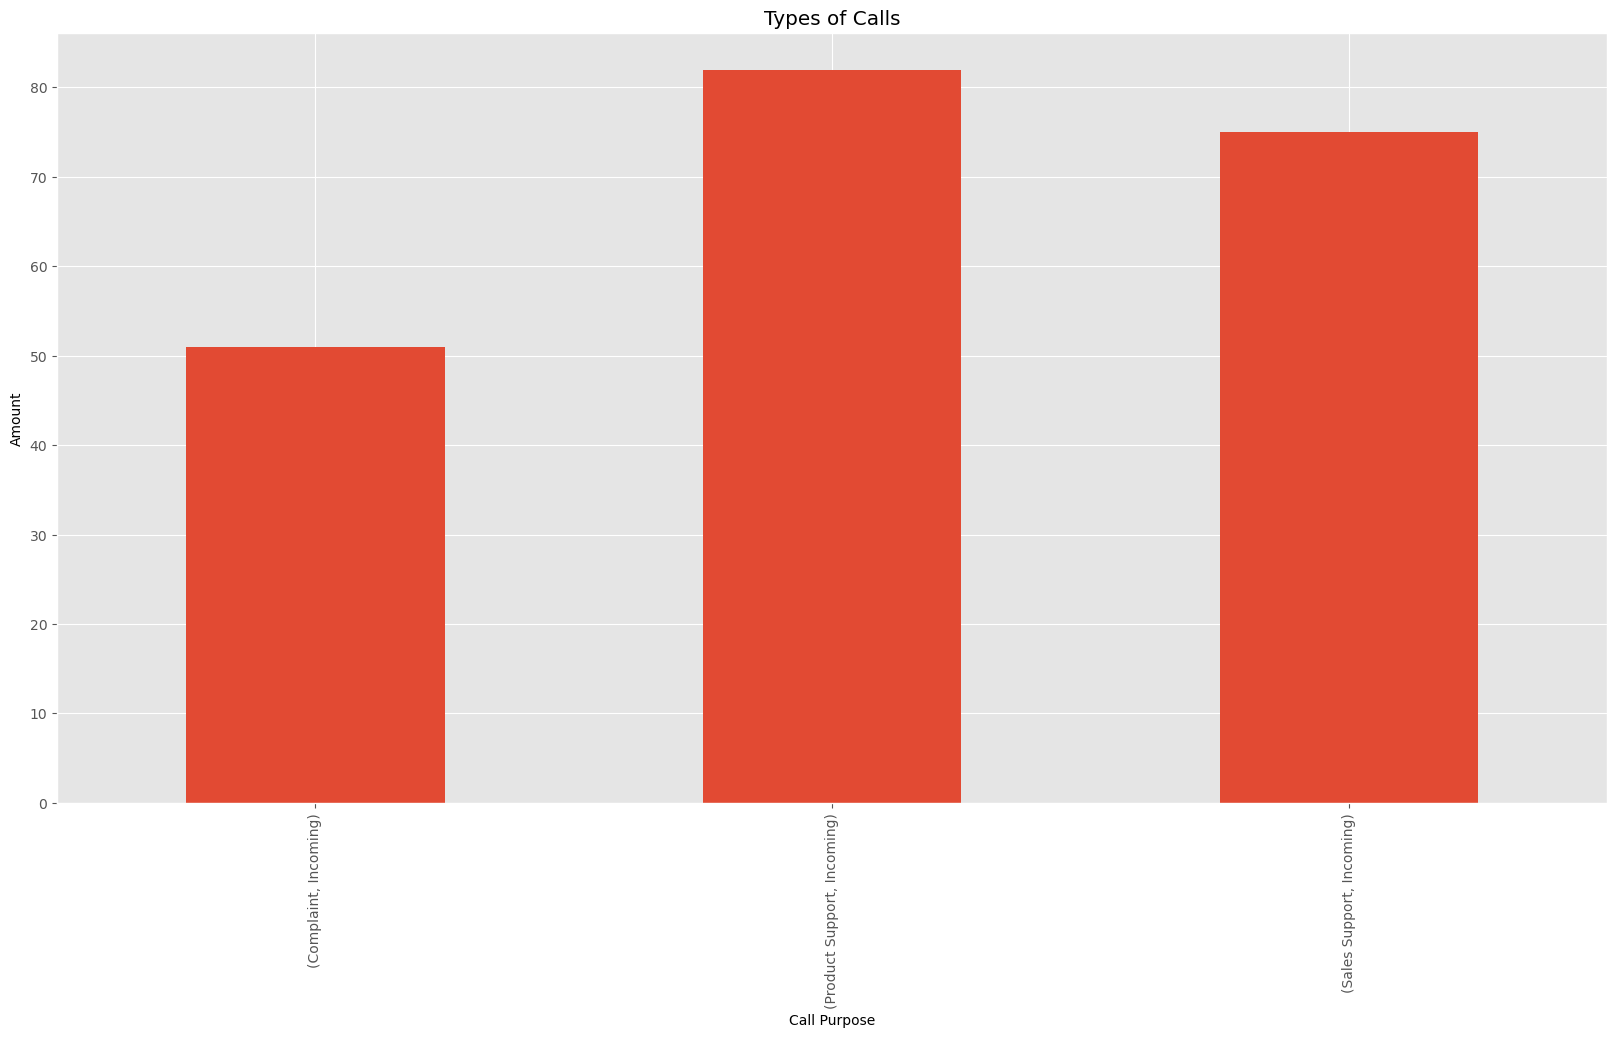

In [249]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


index = ['Complaint', 'Sales Support', 'Product Support']
# axes = purpose_counts.plot.line(subplots=True)
# type(axes)

# categories = list(purpose_counts.keys())
# values = list(purpose_counts.values())

# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
# df2 = purpose_counts({'Incoming': 'Incoming',
#                    'Outgoing': 'Outgoing'}, index=index)
# ax = df2.plot.bar(rot=0)


# ax = df.plot.bar(stacked=True)
purpose_counts.plot.bar(x=dict(), y=purpose_counts)
plt.title('Types of Calls')
plt.ylabel('Amount')
plt.xlabel('Call Purpose')
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

I believe that the South Branch is operating more efficiently due to having a slightly faster average speed of answer and significantly less call abandonment rates. Additionally the south branch is oeprating in the optimal range for call abandonment rates.

##### Record your answer by double clicking here:
> Your Answer:
Average Speed of Answer
South Branch:
  Rep ID  Incoming Wait Time
0    Alice            2.500000
1     Eric            2.611111
2   George            3.153846
3    Helga            3.272727
4     Josh            3.444444
5     Karl            2.888889
6     Kate            3.363636
7    Randy            2.937500
8    Sandy            2.615385
9   Sharon            3.625000
10   Susan            2.916667
North Branch:
   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
Average Speed of Answer by branch:
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% of calls answered within 2 seconds; 33 calls total
- South Branch = 38.10% of calls answered within 2 seconds; 48 calls total
- Company Wide = 38.94% of calls answered within 2 seconds; 81 calls total

Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 3.66% rate north branch (out of the optimal range)
- South Branch = .79% rate south branch (in optimal range)
- Company Wide = 4 total calls were abandoned company wide out of 208 calls total. 1.92% rate company wide (in optimal range)
- Do any of these fall out of the optimal range of 2-5%? Yes, the North Branch is out of the optimal range.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: I believe the North branch would beneifit from additional help due to having less reps (8 in North vs. 10 in South). Additionally the extra help could improve their average speed of answer and decrease the average abandonment rates which are worse in the North branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I don't think I should have cleaned the Calls column as initially performed due to that column being helpful for averages and other calculations. I think it would be helpful to know if there are other regions such as East/West to compare stats between.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: